In [1]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

scenario_params = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150 * 0.95, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
scenario_1.run()

scenario_params2 =  {"end_year": 2100,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150 * 0.95, # in terms of GtCO2 that is gigatons of CO2       
                    "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on 
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
            }

scenario_2 = Scenario(scenario_params2)
scenario_2.compute_country_scenario_params()
print(scenario_2.compute_average_global_growth_rate())
scenario_2.run()

0.010579586185077927
0.00514024971590521


### Plot global quantities as a first check

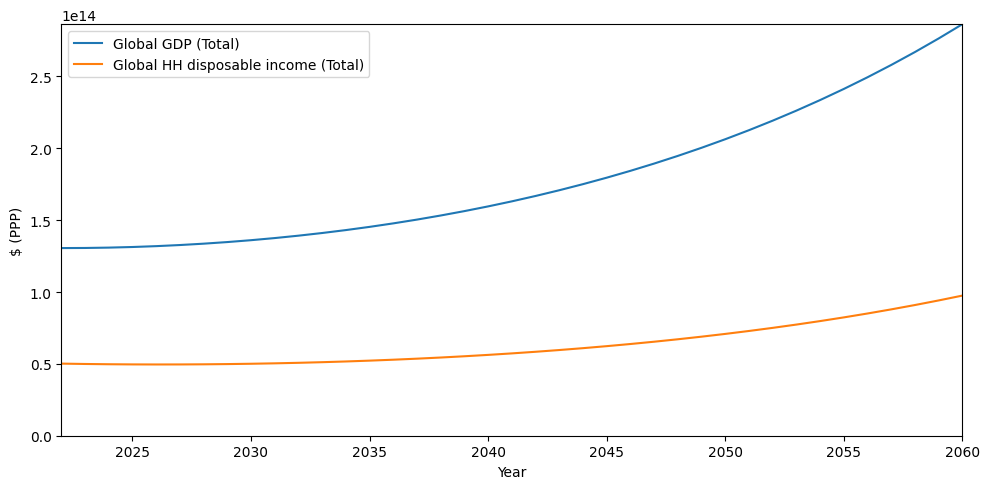

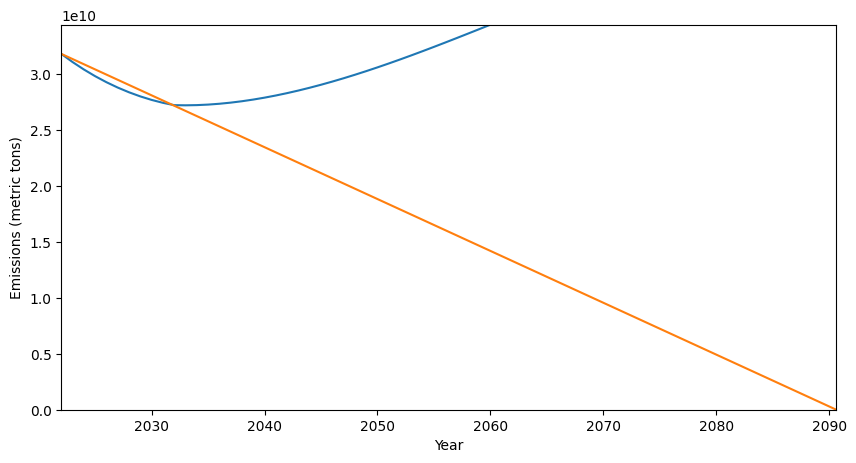

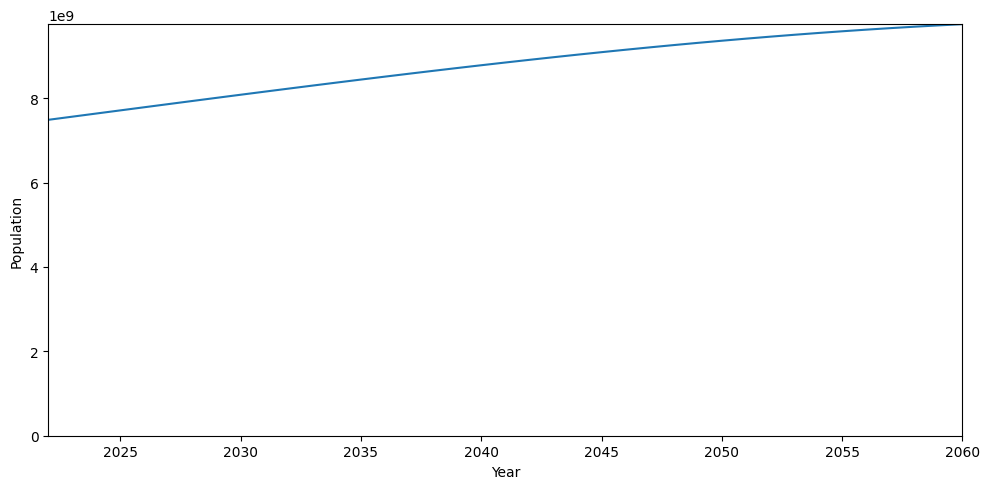

C:\Users\yoswald\AppData\Local\Temp\ipykernel_16280\3217473459.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_16280\3217473459.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_16280\3217473459.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

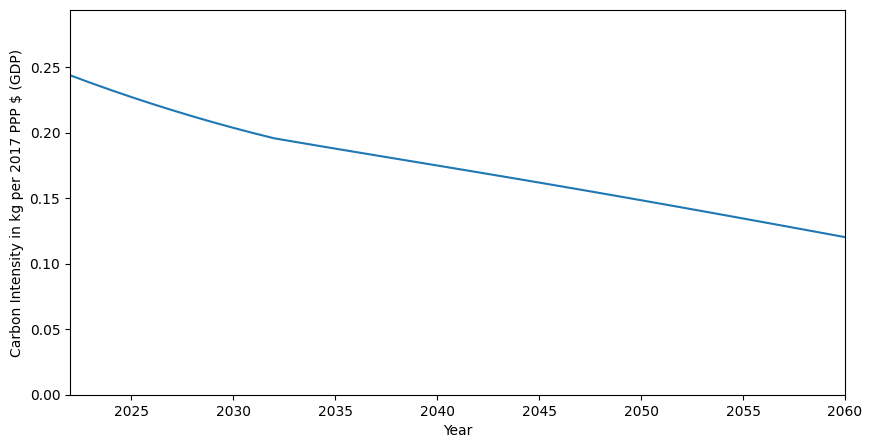

In [2]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()
plotting_1.plot_global_population()
plotting_1.plot_global_carbon_intensity()


# store all the emission trajectories in a dataframe
emission_trajectories = pd.DataFrame()
for country in scenario_1.countries.values():
    emission_trajectories[country.code] = country.emissions_trajectory





### Compute with steady state



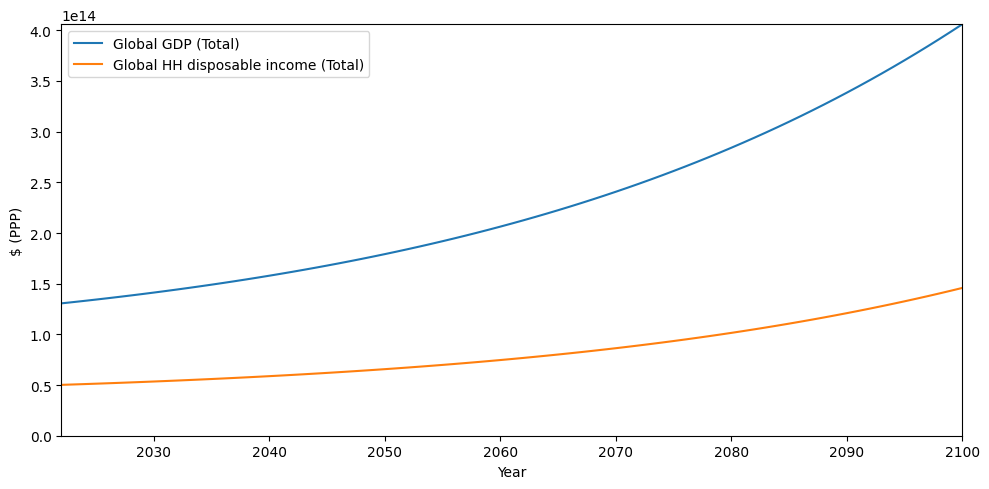

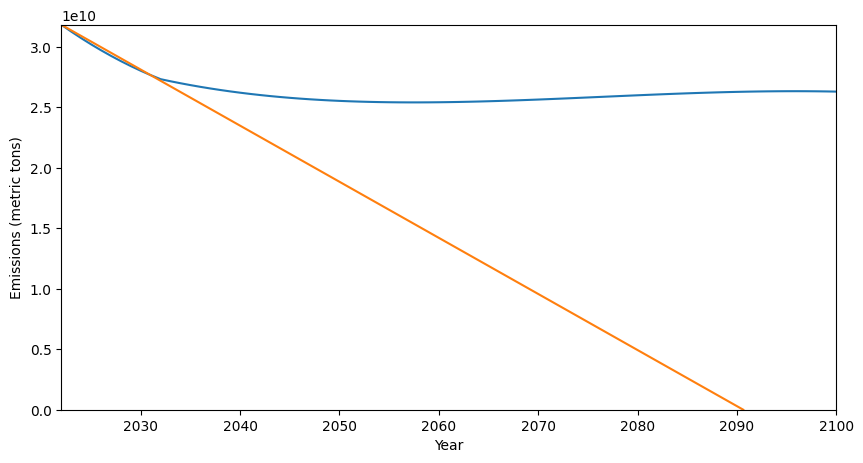

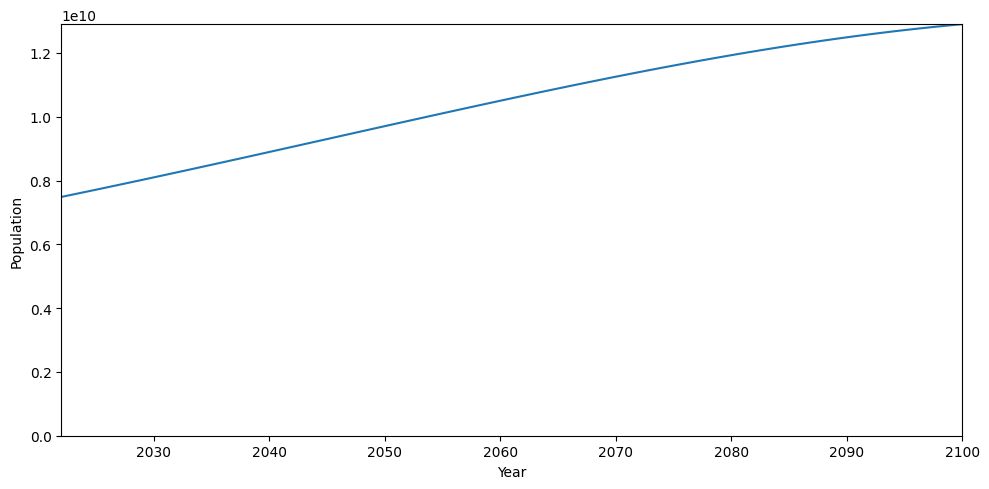

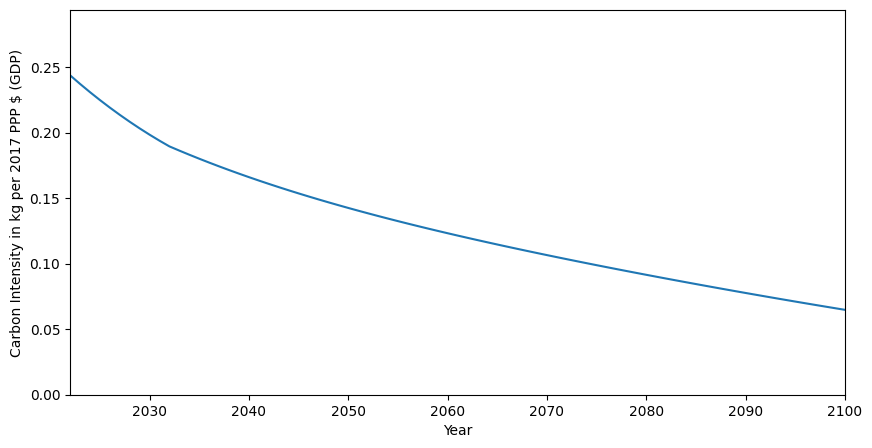

In [3]:
plotting_2 = Plots(scenario_2) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_2.plot_global_economy()
plotting_2.plot_global_emissions()
plotting_2.plot_global_population()
plotting_2.plot_global_carbon_intensity()

#### Compute global gdp per capita average

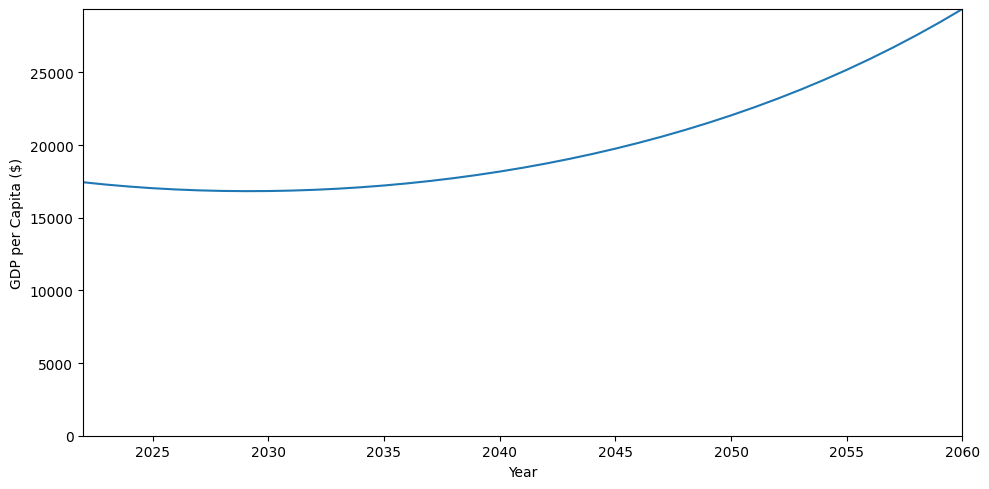

In [4]:
# Compute global gdp per capita average by dividing the global gdp by the global population for 2100 in the gdp trajectory and the pop trajectory
plotting_1.plot_global_gdp_per_capita()

### Plot example country, here the United States

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060]
[32471.366926206916, 31277.103568821378, 30136.92241638258, 29048.149272650266, 28008.250163018725, 27014.82374336524, 26065.59410049654, 25158.403952719145, 24291.20822795333, 23462.067998097977, 22669.14474956668, 21910.69497105936, 21185.065040711528, 20490.686395779834, 19826.070968980424, 19189.806876499817, 18580.554343549324, 17997.041854136696, 17438.062512485347, 16902.47060424477, 16389.178346308476, 15897.152814689607, 15425.413040502386, 14973.027264661108, 14539.11034243984, 14122.821289537062, 13723.36096176196, 13339.969860904579, 12971.926059772111, 12618.543239769784, 12279.168834778244, 11953.182275431724, 11639.993328233344, 11339.04052425728, 11049.789672482908, 10771.732453084678, 10504.385086264372, 10247.287072460056, 9999.999999999

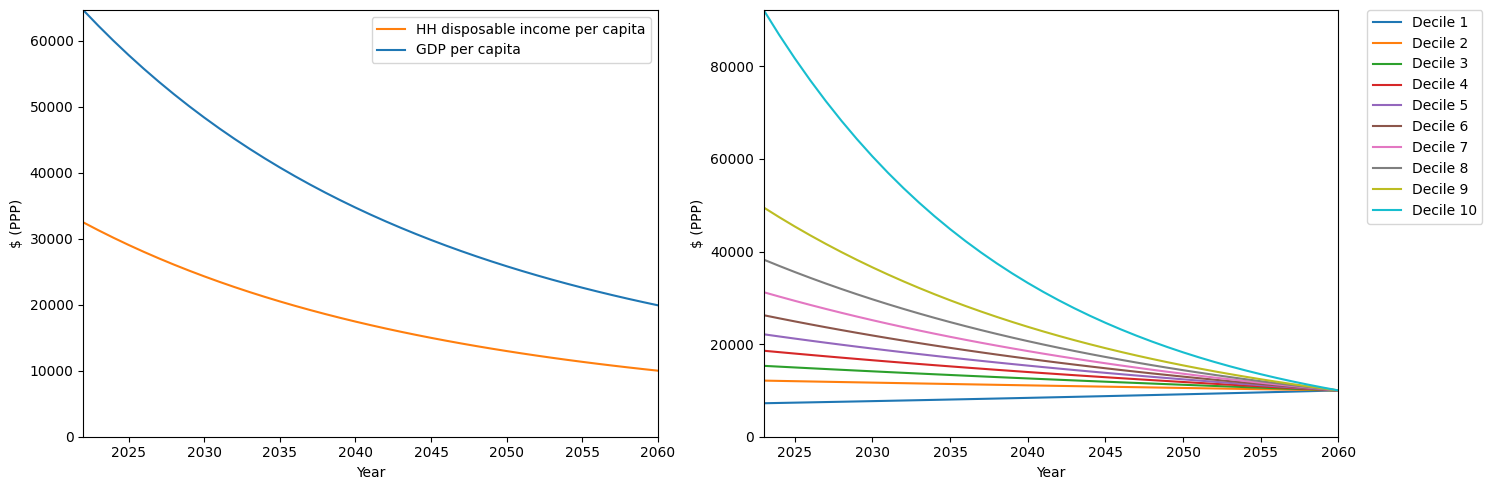

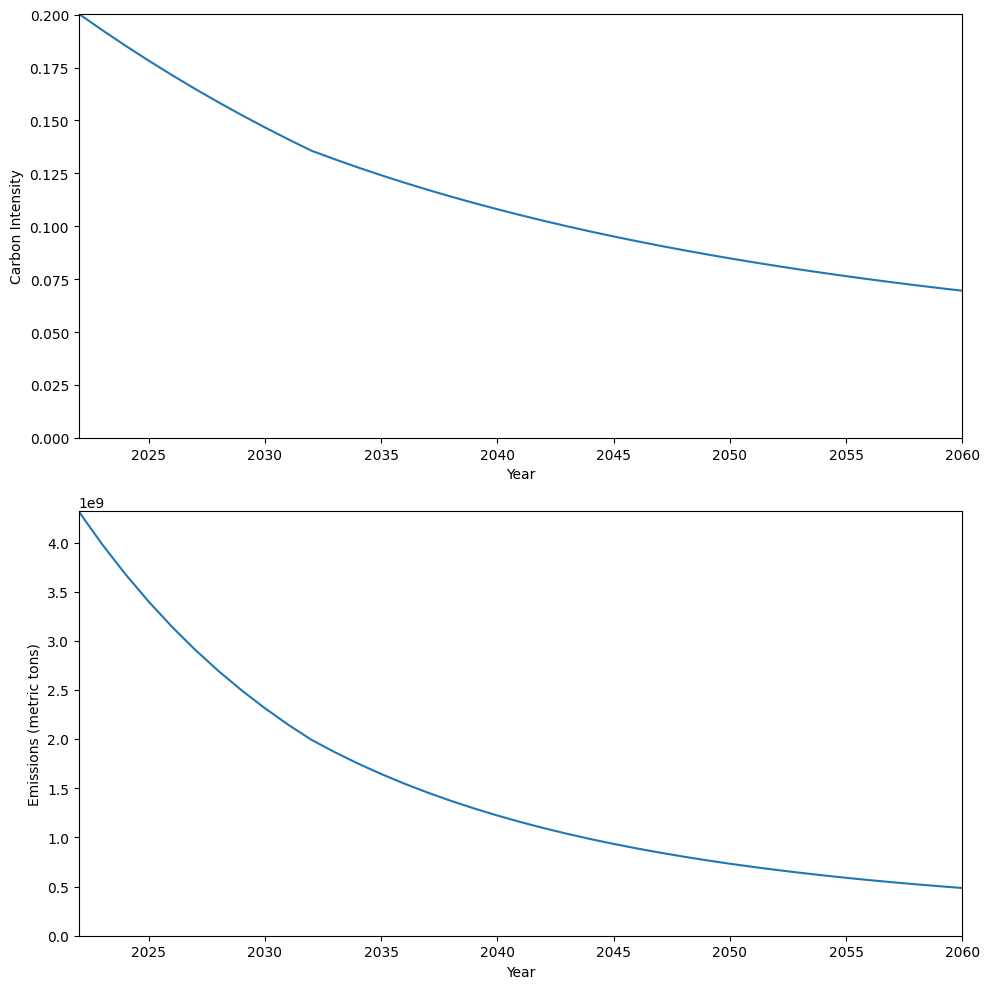

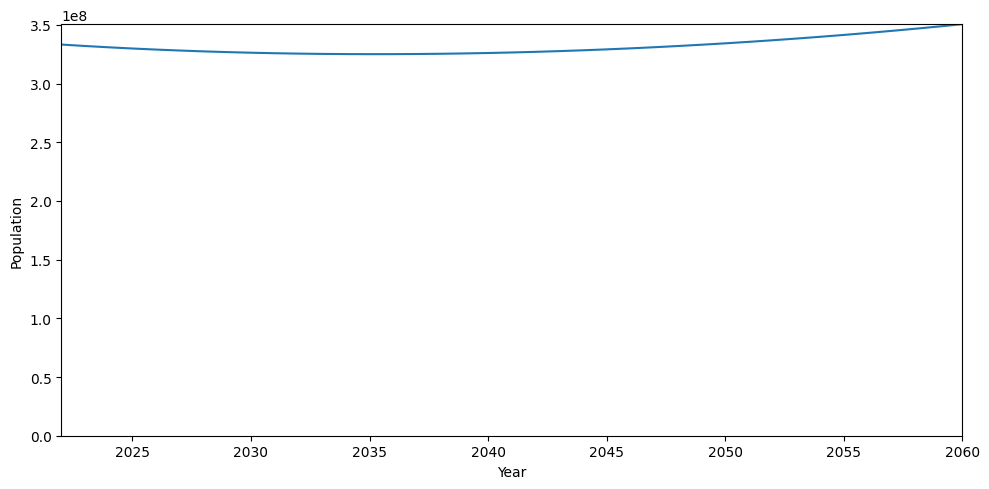

In [5]:
test_country = "United States"
plotting_1.plot_country_economy(test_country)
plotting_1.plot_country_emissions(test_country)
plotting_1.plot_country_population(test_country)

In [6]:
# run a scenario print country specific carbon budgets
scenario_params = {"end_year": 2100,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
scenario_1.run()

0.00514024971590521
